In [76]:
import requests
import pandas as pd
import numpy as np; np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt

def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '18ac4342735c2d916c0c81f9cf6f407b',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
        ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [1,177,168,30,227]

for cuisine in cuisines_list:
    for x in range(0, 100, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [77]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))
# df['cuisines']=df['cuisines'].map(lambda x: x.get('cuisines'))

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes']
newdf = df[keep].copy()

newdf

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes
0,16971711,Snooze,39.7556527778,-104.9889972222,American,4.7,Excellent,642
1,16971985,Steuben's Food Service,39.7433166667,-104.9804694444,American,4.7,Excellent,689
2,16973602,Root Down,39.7631694444,-105.0056138889,"American, Tapas",4.8,Excellent,480
3,16973012,Wynkoop,39.7533500000,-104.9985300000,"American, Burger, Bar Food",4.4,Very Good,420
4,16974402,Euclid Hall,39.7477200000,-104.9999900000,"Bar Food, American",4.5,Excellent,382
5,16970329,My Brother's Bar,39.7563250000,-105.0092388889,"American, Bar Food",4.7,Excellent,274
6,16971517,Sam's No. 3 Downtown,39.7463200000,-104.9954400000,"American, Diner",4.3,Very Good,278
7,16971396,Rock Bottom Brewery - Denver,39.7472700000,-104.9947500000,"American, Bar Food",4.1,Very Good,220
8,16973776,Park Burger,39.6822750000,-104.9804472222,"American, Burger",4.9,Excellent,256
9,16971274,Racines,39.7265638889,-104.9848472222,American,4.3,Very Good,270


In [78]:
newdf.dropna(inplace = True) 
  
# new data frame with split value columns 
cuisines_df = newdf["cuisines"].str.split(" ", n = 3, expand = True) 
  
# making seperate first name column from new data frame 
newdf["First Cuisine"]= cuisines_df[0] 
  
# making seperate last name column from new data frame 
newdf["Second Cuisine"]= cuisines_df[1] 
newdf["Third Cuisine"]= cuisines_df[2] 
newdf["Fourth Cuisine"]= cuisines_df[3] 
  
# Dropping old Name columns 
newdf.drop(columns =["cuisines"], inplace = True) 

# df display 
cuisines_df

,0,1,2,3
0,American,None,None,None
1,American,None,None,None
2,"American,",Tapas,None,None
3,"American,","Burger,",Bar,Food
4,Bar,"Food,",American,None
5,"American,",Bar,Food,None
6,"American,",Diner,None,None
7,"American,",Bar,Food,None
8,"American,",Burger,None,None
9,American,None,None,None


In [89]:
#need to get rid of last 4 within the column
merged_df = pd.merge(newdf, cuisines_df, right_index=True, left_index=True)
# merged_df.drop(columns = ['0', '1', '2', '3'], inplace = True)
# merged_df.drop(['0', '1'], axis=1, inplace = True)
merged_df

,res_id,name,lat,lng,aggregate_rating,rating_text,votes,First Cuisine,Second Cuisine,Third Cuisine,Fourth Cuisine,0,1,2,3
0,16971711,Snooze,39.7556527778,-104.9889972222,4.7,Excellent,642,American,None,None,None,American,None,None,None
1,16971985,Steuben's Food Service,39.7433166667,-104.9804694444,4.7,Excellent,689,American,None,None,None,American,None,None,None
2,16973602,Root Down,39.7631694444,-105.0056138889,4.8,Excellent,480,"American,",Tapas,None,None,"American,",Tapas,None,None
3,16973012,Wynkoop,39.7533500000,-104.9985300000,4.4,Very Good,420,"American,","Burger,",Bar,Food,"American,","Burger,",Bar,Food
4,16974402,Euclid Hall,39.7477200000,-104.9999900000,4.5,Excellent,382,Bar,"Food,",American,None,Bar,"Food,",American,None
5,16970329,My Brother's Bar,39.7563250000,-105.0092388889,4.7,Excellent,274,"American,",Bar,Food,None,"American,",Bar,Food,None
6,16971517,Sam's No. 3 Downtown,39.7463200000,-104.9954400000,4.3,Very Good,278,"American,",Diner,None,None,"American,",Diner,None,None
7,16971396,Rock Bottom Brewery - Denver,39.7472700000,-104.9947500000,4.1,Very Good,220,"American,",Bar,Food,None,"American,",Bar,Food,None
8,16973776,Park Burger,39.6822750000,-104.9804472222,4.9,Excellent,256,"American,",Burger,None,None,"American,",Burger,None,None
9,16971274,Racines,39.7265638889,-104.9848472222,4.3,Very Good,270,American,None,None,None,American,None,None,None


In [90]:
#trying to separate this into 5 separate cuisines
def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '18ac4342735c2d916c0c81f9cf6f407b',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
        ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [1]
#                  ,177,168,30,227]

for cuisine in cuisines_list:
    for x in range(0, 100, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [91]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes']
newdf_american = df[keep].copy()

newdf_american

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes
0,16971711,Snooze,39.7556527778,-104.9889972222,American,4.7,Excellent,642
1,16971985,Steuben's Food Service,39.7433166667,-104.9804694444,American,4.7,Excellent,689
2,16973602,Root Down,39.7631694444,-105.0056138889,"American, Tapas",4.8,Excellent,480
3,16973012,Wynkoop,39.7533500000,-104.9985300000,"American, Burger, Bar Food",4.4,Very Good,420
4,16974402,Euclid Hall,39.7477200000,-104.9999900000,"Bar Food, American",4.5,Excellent,382
5,16970329,My Brother's Bar,39.7563250000,-105.0092388889,"American, Bar Food",4.7,Excellent,274
6,16971517,Sam's No. 3 Downtown,39.7463200000,-104.9954400000,"American, Diner",4.3,Very Good,278
7,16971396,Rock Bottom Brewery - Denver,39.7472700000,-104.9947500000,"American, Bar Food",4.1,Very Good,220
8,16973776,Park Burger,39.6822750000,-104.9804472222,"American, Burger",4.9,Excellent,256
9,16971274,Racines,39.7265638889,-104.9848472222,American,4.3,Very Good,270


In [92]:
def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '18ac4342735c2d916c0c81f9cf6f407b',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
        ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [177]
#                  ,168,30,227]

for cuisine in cuisines_list:
    for x in range(0, 100, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [93]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes']
newdf_sushi = df[keep].copy()

newdf_sushi

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes
0,16972224,Sushi Den,39.6895611111,-104.9804833333,"Japanese, Sushi",4.8,Excellent,571
1,16972233,Sushi Sasa,39.7569200000,-105.0091800000,"Sushi, Japanese",4.6,Excellent,282
2,16969047,Hapa Sushi Grill,39.7193000000,-104.9548500000,"Japanese, Sushi",4.2,Very Good,181
3,16969281,Izakaya Den,39.6897055556,-104.9805666667,"Japanese, Sushi",4.6,Excellent,174
4,16969407,John Holly's Asian Bistro,39.5543250000,-104.8818750000,"Chinese, Japanese, Sushi",4.3,Very Good,116
5,16968443,Dōmo,39.7380944444,-105.0053416667,"Japanese, Sushi",4.1,Very Good,104
6,16973066,Wasabi Sushi Bar,39.7084583333,-105.0773694444,"Sushi, Japanese",4.2,Very Good,100
7,16973903,Joy Sushi Asian Bistro,39.5611850000,-104.9008280000,"Asian, Sushi",4.2,Very Good,50
8,16973218,Hapa Sushi,39.6189611111,-104.9000333333,"Japanese, Sushi",4.2,Very Good,80
9,16972225,Sushi Hai,39.7619083333,-105.0347138889,"Steak, Japanese, Sushi",4.0,Very Good,100


In [94]:
def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '18ac4342735c2d916c0c81f9cf6f407b',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
        ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [168]

for cuisine in cuisines_list:
    for x in range(0, 100, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [95]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes']
newdf_burger = df[keep].copy()

newdf_burger

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes
0,16967791,Cherry Cricket,39.7194800000,-104.9567300000,"American, Burger, Mexican",4.7,Excellent,865
1,16973012,Wynkoop,39.7533500000,-104.9985300000,"American, Burger, Bar Food",4.4,Very Good,420
2,16973776,Park Burger,39.6822750000,-104.9804472222,"American, Burger",4.9,Excellent,256
3,16967789,Cherry Creek Grill,39.7193555556,-104.9496611111,"Burger, American, Steak",4.4,Very Good,207
4,16974364,Crave Real Burgers,39.3948400000,-104.8886300000,Burger,4.6,Excellent,147
5,16974353,Highland Tap and Burger,39.7622700000,-105.0133300000,"American, Burger, Bar Food",4.3,Very Good,134
6,16973328,Rockyard American Grill & Brewing Company,39.4091250000,-104.8694444444,"Burger, American",4.1,Very Good,104
7,16971366,Rialto Cafe,39.7470194444,-104.9945055556,"New American, Sandwich, Burger",3.8,Good,136
8,16973184,Five Guys,39.6746210000,-104.8704510000,"Fast Food, Burger",4.4,Very Good,116
9,16971149,Pumphouse Brewery,40.1688222222,-105.1023861111,"American, Burger, Tex-Mex",4.5,Excellent,139


In [96]:
def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '18ac4342735c2d916c0c81f9cf6f407b',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
        ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [30]

for cuisine in cuisines_list:
    for x in range(0, 100, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [97]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes']
newdf_cafe = df[keep].copy()

newdf_cafe

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes
0,16969910,Lucile's Creole Cafe,39.7115277778,-104.9829472222,"Cafe, Cajun",4.6,Excellent,241
1,16975729,Voodoo Doughnut,39.7399638889,-104.9692694444,"Cafe, Desserts",4.1,Very Good,156
2,16974085,Crema,39.7611722222,-104.9819250000,Cafe,3.9,Good,65
3,16969911,Lucile's Creole Cafe,40.1682694444,-105.1011277778,"Cafe, Cajun",4.2,Very Good,80
4,16974838,Lucile's Creole Cafe,39.6123083333,-105.0242527778,"Cafe, Cajun",3.9,Good,67
5,16971980,Stella's Coffee Haus,39.6897277778,-104.9802333333,"Cafe, Desserts",4.2,Very Good,74
6,16973845,The French Press,39.7091970000,-105.0786280000,Cafe,4.0,Very Good,51
7,16967055,Aviano Coffee,39.7203361111,-104.9545361111,Cafe,3.8,Good,37
8,16971806,St. Mark's Coffeehouse,39.7433777778,-104.9629277778,"Cafe, Sandwich, Coffee and Tea",3.9,Good,34
9,16969684,LaMar's Donuts and Coffee,39.6749370000,-104.8707120000,"Cafe, Donuts",3.5,Good,9


In [98]:
def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '18ac4342735c2d916c0c81f9cf6f407b',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
        ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [227]

for cuisine in cuisines_list:
    for x in range(0, 100, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [99]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes']
newdf_barfood = df[keep].copy()

newdf_barfood

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes
0,16974402,Euclid Hall,39.7477200000,-104.9999900000,"Bar Food, American",4.5,Excellent,382
1,16973012,Wynkoop,39.7533500000,-104.9985300000,"American, Burger, Bar Food",4.4,Very Good,420
2,16970329,My Brother's Bar,39.7563250000,-105.0092388889,"American, Bar Food",4.7,Excellent,274
3,16971396,Rock Bottom Brewery - Denver,39.7472700000,-104.9947500000,"American, Bar Food",4.1,Very Good,220
4,16967466,Bull & Bush,39.7032250000,-104.9324194444,"American, Bar Food",4.4,Very Good,176
5,16973111,Vine Street Pub,39.7434166667,-104.9619916667,"American, Bar Food",4.5,Excellent,149
6,16974353,Highland Tap and Burger,39.7622700000,-105.0133300000,"American, Burger, Bar Food",4.3,Very Good,134
7,16974400,Freshcraft,39.7499100000,-104.9995200000,"Bar Food, American",4.2,Very Good,105
8,16974072,Cheddar's Scratch Kitchen,39.5936100000,-104.8043100000,"American, Burger, Bar Food",4.3,Very Good,88
9,16968700,Falling Rock Taphouse,39.7538500000,-104.9953900000,"Bar Food, American",4.1,Very Good,108


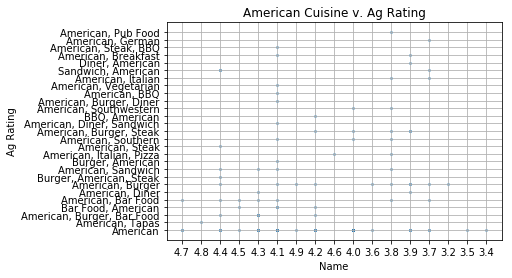

<Figure size 3600x3600 with 0 Axes>

In [100]:
plt.scatter(newdf_american["aggregate_rating"], newdf_american["cuisines"],  marker = ".", s = 10)

plt.title("American Cuisine v. Ag Rating")
plt.ylabel("Ag Rating")
plt.xlabel("Name")
plt.grid(True)

plt.figure(figsize=(50, 50))

plt.savefig('pic.png', dpi=500)

# Show plot
plt.show()

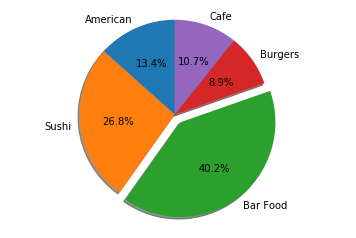

In [101]:
labels = 'American', 'Sushi', 'Bar Food', 'Burgers', 'Cafe'
sizes = [15, 30, 45, 10, 12]
explode = (0, 0, .1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()